In [1]:
import xarray as xr
import os
import xesmf
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import matplotlib.colors as colors
import cv2
import datetime

In [2]:
hgrid = xr.open_dataset('/work/ovs/iOM4/SP_025deg.nc')

In [3]:
hgrid

<xarray.Dataset>
Dimensions:   (nyp: 2361, nxp: 2881, ny: 2360, nx: 2880)
Dimensions without coordinates: nyp, nxp, ny, nx
Data variables:
    tile      |S255 ...
    y         (nyp, nxp) float64 ...
    x         (nyp, nxp) float64 ...
    dy        (ny, nxp) float64 ...
    dx        (nyp, nx) float64 ...
    area      (ny, nx) float64 ...
    angle_dx  (nyp, nxp) float64 ...
Attributes:
    history:      This grid file was generated via command /home/Olga.Sergien...
    description:  This is an orthogonal coordinate grid for the Earth with a ...
    source:       /home/Olga.Sergienko/ocean_model_grid_generator/ocean_grid_...

In [4]:
topodir = "/work/ovs/iOM4/INPUT"
# topo_SC = xr.open_dataset(f"{topodir}/topo_SP_025deg.ncSC.nc")
# topo_SO = xr.open_dataset(f"{topodir}/topo_SP_025deg.ncSO.nc")
# topo_Merc = xr.open_dataset(f"{topodir}/topo_SP_025deg.ncMerc.nc")
# topo_BP = xr.open_dataset(f"{topodir}/topo_SP_025deg.ncBP.nc")
topo_BM = xr.open_dataset(f"{topodir}/bed_bedmachine_remapped_iOM4_SP_025deg.nc")
topo_Niki =  xr.open_dataset(f"{topodir}/topo_SP_025deg.nc")
thick_BM = xr.open_dataset(f"{topodir}/thickness_bedmachine_remapped_iOM4_SP_025deg.nc")
# firn_BM = xr.open_dataset(f"{topodir}/firn_bedmachine_remapped_iOM4_SP_025deg.nc")
mask_BM = xr.open_dataset(f"{topodir}/mask_bedmachine_remapped_iOM4_SP_025deg.nc")
thickOM4 = xr.open_dataset(f"{topodir}/AIS_thick_SP_025deg.nc")
maskOM4 = xr.open_dataset(f"{topodir}/AIS_h_mask_SP_025deg.nc")

In [5]:
grid_mom = xr.Dataset()
grid_mom['lon'] = hgrid['x'][1::2, 1::2].rename(nxp='nx', nyp='ny')
grid_mom['lat'] = hgrid['y'][1::2, 1::2].rename(nxp='nx',nyp='ny')
grid_mom['lon_b'] = hgrid['x'][0::2, 0::2]
grid_mom['lat_b'] = hgrid['y'][0::2, 0::2]
grid_mom['area']=hgrid['area'][::2,::2]+hgrid['area'][1::2,::2]+hgrid['area'][::2,1::2]+hgrid['area'][1::2,1::2]

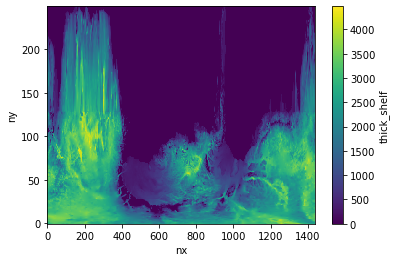

In [6]:
thickOM4.thick_shelf[0:250,:].plot()

In [7]:
grid_mom

<xarray.Dataset>
Dimensions:  (ny: 1180, nx: 1440, nyp: 1181, nxp: 1441)
Dimensions without coordinates: ny, nx, nyp, nxp
Data variables:
    lon      (ny, nx) float64 ...
    lat      (ny, nx) float64 ...
    lon_b    (nyp, nxp) float64 ...
    lat_b    (nyp, nxp) float64 ...
    area     (ny, nx) float64 1.154e+07 1.154e+07 ... 1.788e+06 6.001e+05

In [8]:
thick_BM.thickness.values[270:,:]=0.0

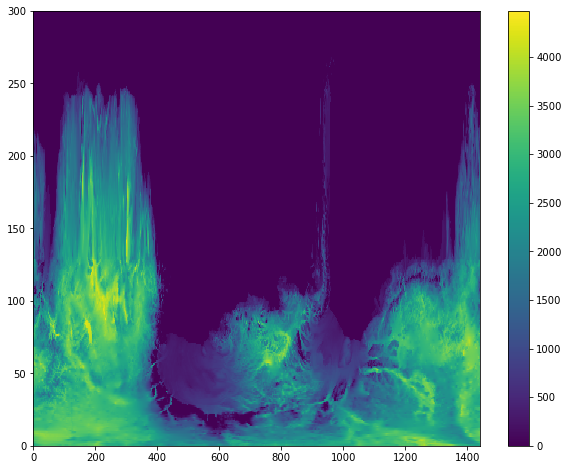

In [9]:
plt.figure(figsize=[10,8])
# ax.stock_img()
plt.pcolormesh(thick_BM.thickness.values,shading='auto')
# plt.clim([-6000,6000])
plt.colorbar()
# ax.set_extent([-180, 180, -65, -90], ccrs.PlateCarree())
# ax.gridlines(color='black', alpha=0.5, linestyle='--')
# plt.savefig("/home/Olga.Sergienko/gridtopo_sandbox/PIG_ice_speed.eps")
plt.show()

In [10]:
thick_cor=thick_BM.thickness.values.copy()
thickm1=thick_cor[mask_BM.mask.values==1].copy()
thickm2=thick_cor[mask_BM.mask.values==2].copy()
thickm3=thick_cor[mask_BM.mask.values==3].copy()
thickm1[thickm1<10.]=10.
thickm2[thickm2<10.]=10.
thickm3[thickm3<10.]=10.
thick_cor[mask_BM.mask.values==1]=thickm1
thick_cor[mask_BM.mask.values==2]=thickm2
thick_cor[mask_BM.mask.values==3]=thickm3

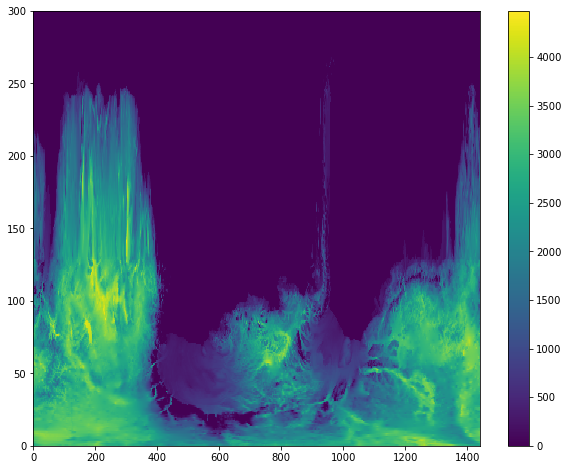

In [10]:
plt.figure(figsize=[10,8])
# ax.stock_img()
plt.pcolormesh(thick_cor,shading='auto')
# plt.clim([-6000,6000])
plt.colorbar()
# ax.set_extent([-180, 180, -65, -90], ccrs.PlateCarree())
# ax.gridlines(color='black', alpha=0.5, linestyle='--')
# plt.savefig("/home/Olga.Sergienko/gridtopo_sandbox/PIG_ice_speed.eps")
plt.show()

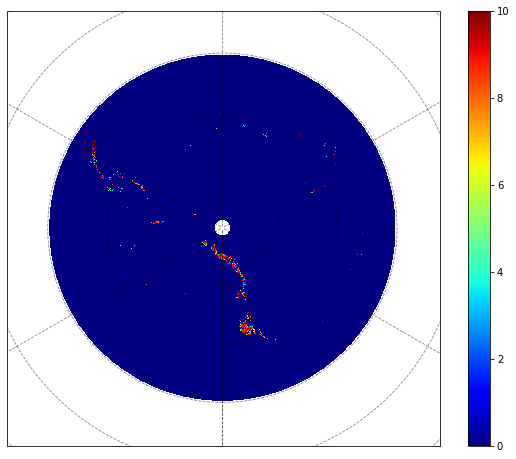

In [11]:
subplot_kws=dict(projection=ccrs.SouthPolarStereo(central_longitude=0.),
                 facecolor='grey')
plt.figure(figsize=[10,8])
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=0.))
# ax.stock_img()
plt.pcolormesh(grid_mom.lon_b.values[:300,:],grid_mom.lat_b.values[:300,:],thick_cor-thick_BM.thickness.values,shading='auto',cmap='jet',transform=ccrs.PlateCarree()),
# plt.clim(-0,4),
plt.colorbar()
ax.set_extent([-180, 180, -53, -90], ccrs.PlateCarree())
ax.gridlines(color='black', alpha=0.5, linestyle='--')
# plt.savefig("H_full_bm.png")
plt.show()

In [78]:
ds_mask = xr.Dataset()
ds_mask['thick_shelf'] = 0.*topo_Niki.height[1::2,1::2]
ds_mask.thick_shelf.values[:300,:]=thick_cor.copy()
ds_mask.to_netcdf(f"{topodir}/AIS_thick_SP_025deg.nc", format='NETCDF3_64BIT')

In [12]:
mask_BM.mask.values[270:,:]=0.0
mask_BM.mask.values[210:,400:450]=0.
mask_BM.mask.values[245:260,125:135]=0.
mask_BM.mask.values[255:260,165:200]=0.
mask_BM.mask.values[255:260,958:965]=0.
mask_BM.mask.values[260:264,960:963]=0.
mask_BM.mask.values[260:264,967:973]=0.
mask_BM.mask.values[240:245,1390:1400]=0.

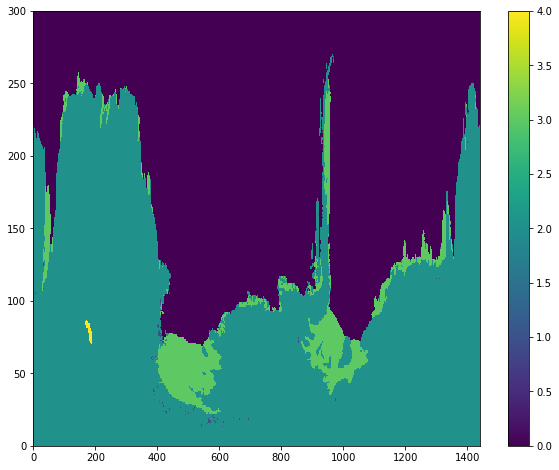

In [13]:
plt.figure(figsize=[10,8])
# ax.stock_img()
plt.pcolormesh(mask_BM.mask.values,shading='auto')
# plt.clim([-6000,6000])
plt.colorbar()
# ax.set_extent([-180, 180, -65, -90], ccrs.PlateCarree())
# ax.gridlines(color='black', alpha=0.5, linestyle='--')
# plt.savefig("/home/Olga.Sergienko/gridtopo_sandbox/PIG_ice_speed.eps")
plt.show()

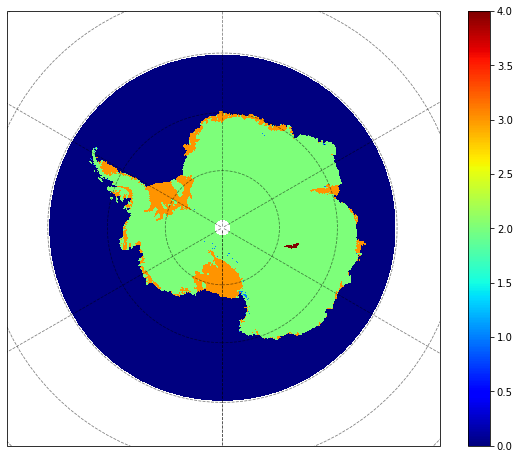

In [14]:
subplot_kws=dict(projection=ccrs.SouthPolarStereo(central_longitude=0.),
                 facecolor='grey')
plt.figure(figsize=[10,8])
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=0.))
# ax.stock_img()
plt.pcolormesh(grid_mom.lon_b.values[:300,:],grid_mom.lat_b.values[:300,:],mask_BM.mask.values,shading='auto',cmap='jet',transform=ccrs.PlateCarree()),plt.clim(-0,4),plt.colorbar()
ax.set_extent([-180, 180, -53, -90], ccrs.PlateCarree())
ax.gridlines(color='black', alpha=0.5, linestyle='--')
# plt.savefig("H_full_bm.png")
plt.show()

In [15]:
rho_ice = 917
rho_w = 1027
delta = 1-rho_ice/rho_w

In [69]:
mask=np.zeros_like(mask_BM.mask.values)
mask[mask_BM.mask.values>0]=1
mask[105:110,780]=0.
mask_flt=np.zeros_like(mask_BM.mask.values)
mask_flt[mask_BM.mask.values==2]=1
mask_flt[mask_BM.mask.values==4]=1
mask_flt[mask_BM.mask.values==1]=1
# dummH=(1+maskflt)*(mom_topo.bed_elev.values.copy()+mom_topo.surf_elev.values.copy())-maskflt*mom_topo.surf_elev.values.copy()/delta
# dummH[dummH<0]=10.
# thick_shelf=dummH*mask
float_fraction=np.ones_like(mask)*np.float64(rho_ice/rho_w*thick_cor>-topo_BM.bed.values)
OD=(1-float_fraction)*(-topo_BM.bed.values.copy()-rho_ice/rho_w*thick_cor)
# depth=mom_topo.bed_elev.values.copy()
# depth[depth<10]=10
# shelf_mass = thick_shelf*rho_ice
# h_mask=mask
# h_mask[0,:]=3

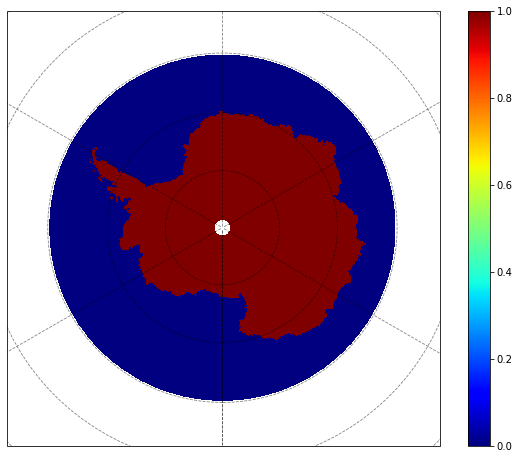

In [29]:
subplot_kws=dict(projection=ccrs.SouthPolarStereo(central_longitude=0.),
                 facecolor='grey')
plt.figure(figsize=[10,8])
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=0.))
# ax.stock_img()
plt.pcolormesh(grid_mom.lon_b.values[:300,:],grid_mom.lat_b.values[:300,:],mask,shading='auto',cmap='jet',transform=ccrs.PlateCarree()),
# plt.clim(-0,4),
plt.colorbar()
ax.set_extent([-180, 180, -53, -90], ccrs.PlateCarree())
ax.gridlines(color='black', alpha=0.5, linestyle='--')
# plt.savefig("H_full_bm.png")
plt.show()

In [56]:
icefront=cv2.Canny(np.uint8(mask*100+100),0,200,5,L2gradient=True)

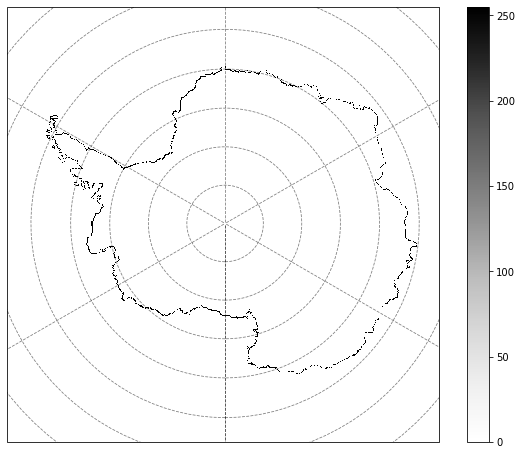

In [57]:
subplot_kws=dict(projection=ccrs.SouthPolarStereo(central_longitude=0.),
                 facecolor='grey')
plt.figure(figsize=[10,8])
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=0.))
# ax.stock_img()
plt.pcolormesh(grid_mom.lon_b.values[:300,:],grid_mom.lat_b.values[:300,:],icefront,shading='auto',cmap='Greys',transform=ccrs.PlateCarree()),plt.colorbar()
ax.set_extent([-180, 180, -62, -90], ccrs.PlateCarree())
ax.gridlines(color='black', alpha=0.5, linestyle='--')
# plt.savefig("Surf_elev.png")
plt.show()

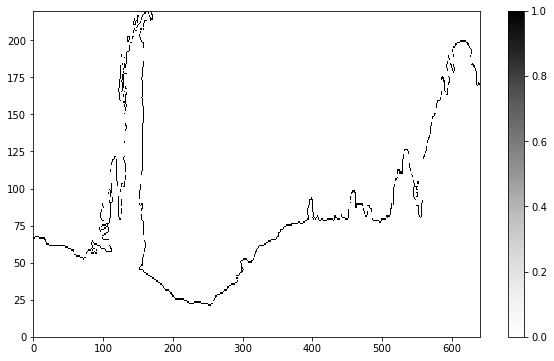

In [36]:
dumif=icefront/255
plt.figure(figsize=[10,6])
# ax.stock_img()
plt.pcolormesh(dumif[50:270,800:],shading='auto',cmap='Greys'),plt.colorbar()
plt.show()

In [44]:
dumif.shape

(300, 1440)

In [38]:
vel_face_mask=np.zeros_like(grid_mom.lon_b.values)
vel_face_mask[:300,1:]=-2*mask+4*dumif
vel_face_mask[:,0]=vel_face_mask[:,1]
vel_face_mask[vel_face_mask==4]=2
vel_face_mask[0,:]=3
# umask=np.zeros_like(bm_mom.lon_b.values)
# umask[:-1,1:]=mask
# umask[:,0]=umask[:,1]
# umask[0,:]=3

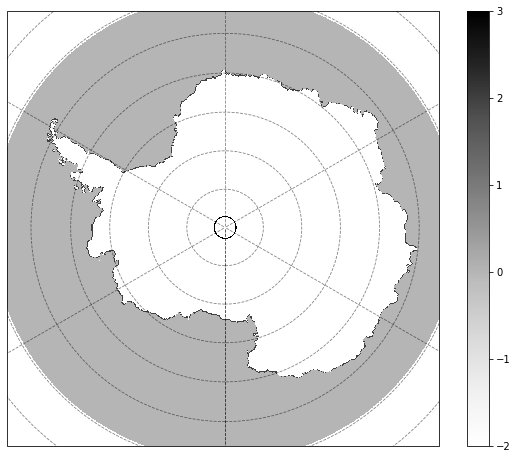

In [39]:
subplot_kws=dict(projection=ccrs.SouthPolarStereo(central_longitude=0.),
                 facecolor='grey')
plt.figure(figsize=[10,8])
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=0.))
# ax.stock_img()
plt.pcolormesh(grid_mom.lon_b.values[:300,:],grid_mom.lat_b.values[:300,:],vel_face_mask[:300,:],shading='auto',cmap='Greys',transform=ccrs.PlateCarree()),plt.colorbar()
ax.set_extent([-180, 180, -62, -90], ccrs.PlateCarree())
ax.gridlines(color='black', alpha=0.5, linestyle='--')
# plt.savefig("Surf_elev.png")
plt.show()

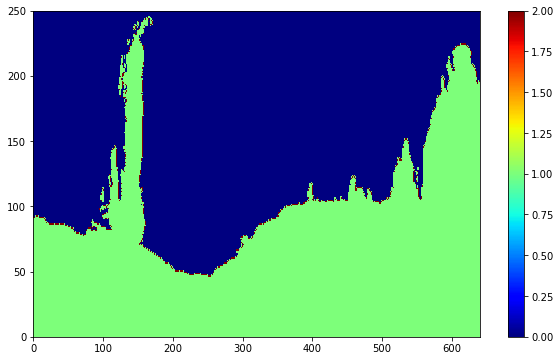

In [68]:
# dumhmask=h_mask;
duhmask=mask.copy()
# ddumif=np.zeros_like(dum)
# duhmask[:-1,:]=duhmask[:-1,:]+dumif[1:,:]
duhmask=duhmask+dumif
duhmask[105:110,780]=0.
dumplot = duhmask
plt.figure(figsize=[10,6])
# ax.stock_img()
plt.pcolormesh(dumplot[25:275,800:],shading='auto',cmap='jet'),plt.colorbar()
plt.show()

In [18]:
uv_rmpd = xr.open_dataset(f"{topodir}/obs_vel_mom6_SP_025degSO.nc4")
# VX=uv_rmpd["uobs 1"][0,:,:]
# VY=uv_rmpd["uobs 2"][0,:,:]
uv_rmpd_ms = xr.open_dataset(f"{topodir}/Mesures_vel_mom6_SP_025degSO.nc4")
msk=np.where(mask_flt>0,mask_flt,np.nan)
VX=np.where(np.isnan(uv_rmpd["uobs 1"][0,:,:]*msk),uv_rmpd_ms.VX.values/(86400*365.25),uv_rmpd["uobs 1"][0,:,:]*mask_flt)
VY=np.where(np.isnan(uv_rmpd["uobs 2"][0,:,:]*msk),uv_rmpd_ms.VY.values/(86400*365.25),uv_rmpd["uobs 2"][0,:,:]*mask_flt)

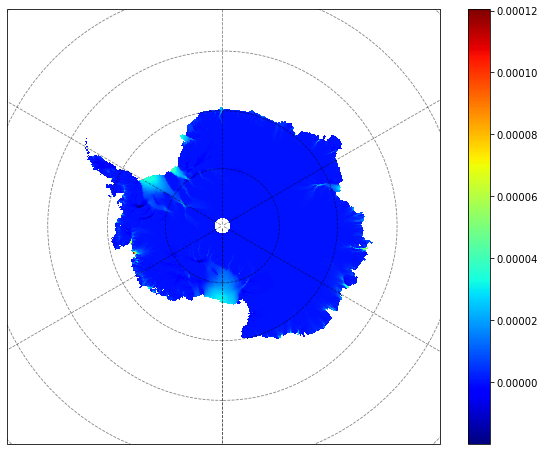

In [34]:
subplot_kws=dict(projection=ccrs.SouthPolarStereo(central_longitude=0.),
                 facecolor='grey')
plt.figure(figsize=[10,8])
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=0.))
# ax.stock_img()
plt.pcolormesh(grid_mom.lon_b.values[:300,:],grid_mom.lat_b.values[:300,:],VY,shading='auto',cmap='jet',transform=ccrs.PlateCarree()),
# plt.clim(-0,4),
plt.colorbar()
ax.set_extent([-180, 180, -53, -90], ccrs.PlateCarree())
ax.gridlines(color='black', alpha=0.5, linestyle='--')
# plt.savefig("H_full_bm.png")
plt.show()

In [19]:
bbar=xr.open_dataset(f'{topodir}/inv_Mucrs_SP_025deg.nc')
# beta.beta.values[beta.beta.values>18.]=18.
# Aglen=(bbar.alpha.values**2)**(-3)
Aglen=np.where(np.isnan((bbar.alpha.values**2)**(-3)),2.1e-25,(bbar.alpha.values**2)**(-3))

In [20]:
vx=np.where(np.isnan(VX),0,VX)
vy=np.where(np.isnan(VY),0,VY)
j60s=601
dx=hgrid.dx.values[1:j60s:2,::2]
dy=hgrid.dy.values[1:j60s:2,1::2]

In [67]:
bbar.alpha

<xarray.DataArray 'alpha' (yh: 1180, xh: 1440)>
array([[12961.481408, 12961.481408, 12961.481408, ..., 12961.481408,
        12961.481408, 12961.481408],
       [12961.481408, 12961.481409, 12961.481409, ..., 12961.481408,
        12961.481408, 12961.481408],
       [12961.481409, 12961.48141 , 12961.48141 , ..., 12961.481409,
        12961.481409, 12961.481409],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])
Coordinates:
    lon      (yh, xh) float64 ...
    lat      (yh, xh) float64 ...
Dimensions without coordinates: yh, xh

In [21]:
vx_x=np.gradient(vx,axis=1)/dx
vx_y=np.gradient(vx,axis=0)/dy
vy_x=np.gradient(vy,axis=1)/dx
vy_y=np.gradient(vy,axis=0)/dy
nu= (Aglen[:300,:])**(-1/3)/2*(vx_x**2+vy_y**2+vx_x*vy_y+1/4*(vx_y+vy_x)**2+1.0e-23)**((1-3)/(2*3))

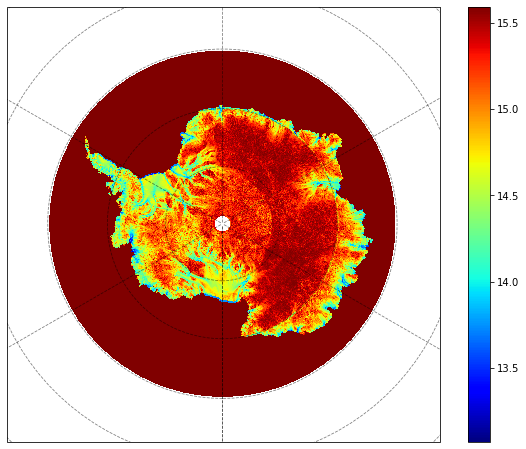

In [22]:
subplot_kws=dict(projection=ccrs.SouthPolarStereo(central_longitude=0.),
                 facecolor='grey')
plt.figure(figsize=[10,8])
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=0.))
# ax.stock_img()
plt.pcolormesh(grid_mom.lon_b.values[:300,:],grid_mom.lat_b.values[:300,:],np.log10(nu),shading='auto',cmap='jet',transform=ccrs.PlateCarree()),
# plt.clim(1.6e8,1.8e8),
plt.colorbar()
ax.set_extent([-180, 180, -53, -90], ccrs.PlateCarree())
ax.gridlines(color='black', alpha=0.5, linestyle='--')
# plt.savefig("H_full_bm.png")
plt.show()

In [23]:
beta=xr.open_dataset(f'{topodir}/inv_Betacrs_SP_025deg.nc')
beta_nu5km=xr.open_dataset(f'{topodir}/inv_MuBetaNu_remapped_iOM4_SP_025deg.nc')
beta.beta.values[beta.beta.values>18.]=-5.
beta.beta.values[beta.beta.values>15.]=15.
beta_5km=beta_nu5km.beta.values[0,:,:]
beta_5km[beta_5km>18.]=-5.
beta_5km[beta_5km>15.]=15.
# beta_taub=10**(beta.beta.values)
beta_taub=np.where(np.isnan(beta_nu5km.beta.values[0,:,:]),10**(beta.beta.values),10**(beta_5km))
beta_taub=np.where(np.isnan(beta_taub),1.e10,beta_taub)

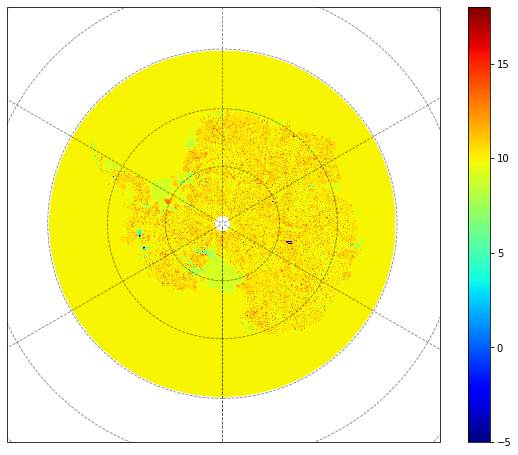

In [24]:
subplot_kws=dict(projection=ccrs.SouthPolarStereo(central_longitude=0.),
                 facecolor='grey')
plt.figure(figsize=[10,8])
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=0.))
# ax.stock_img()
plt.pcolormesh(grid_mom.lon_b.values[:300,:],grid_mom.lat_b.values[:300,:],np.log10(beta_taub[:300,:]),shading='auto',cmap='jet',transform=ccrs.PlateCarree()),
plt.clim(-5,18),
plt.colorbar()
ax.set_extent([-180, 180, -53, -90], ccrs.PlateCarree())
ax.gridlines(color='black', alpha=0.5, linestyle='--')
# plt.savefig("H_full_bm.png")
plt.show()

In [25]:
ubdry_val=np.zeros_like(grid_mom.lon_b.values)
ubdry_val[0,1:]=vx[0,:]
ubdry_val[0,0]=vx[0,0]
vbdry_val=np.zeros_like(grid_mom.lon_b.values)
vbdry_val[0,1:]=vy[0,:]
vbdry_val[0,0]=vy[0,0]
vx_f=np.zeros_like(grid_mom.lon_b.values)
vx_f[:300,1:]=vx
vx_f[0,1:]=vx[0,:]
# vx_f[1:,0]=vx[:,0]
vx_f[0,0]=vx[0,0]
vy_f=np.zeros_like(grid_mom.lon_b.values)
vy_f[:300,1:]=vy
vx_f[0,1:]=vy[0,:]
# vx_f[1:,0]=vy[:,0]
vx_f[0,0]=vy[0,0]

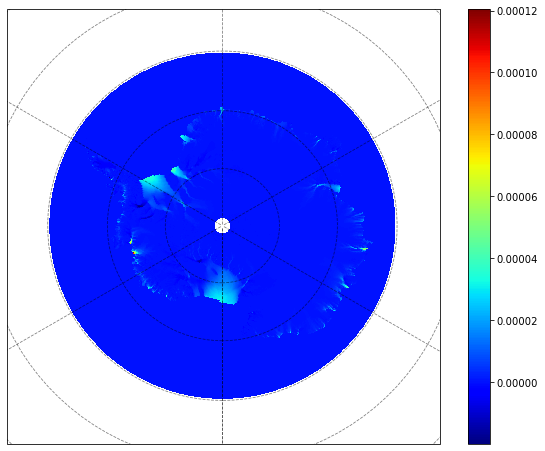

In [26]:
subplot_kws=dict(projection=ccrs.SouthPolarStereo(central_longitude=0.),
                 facecolor='grey')
plt.figure(figsize=[10,8])
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=0.))
# ax.stock_img()
plt.pcolormesh(grid_mom.lon_b.values[:300,:],grid_mom.lat_b.values[:300,:],vy_f[:300,:],shading='auto',cmap='jet',transform=ccrs.PlateCarree()),
# plt.clim(-5,18),
plt.colorbar()
ax.set_extent([-180, 180, -53, -90], ccrs.PlateCarree())
ax.gridlines(color='black', alpha=0.5, linestyle='--')
# plt.savefig("H_full_bm.png")
plt.show()

In [38]:
ds_mask = xr.Dataset()
ds_mask['h_mask'] = 0.*topo_Niki.height[1::2,1::2]
ds_mask.h_mask.values[:300,:]=mask.copy()
ds_mask.h_mask.values[0,:]=3.
ds_mask.h_mask.attrs=dict(units='none',description='mask for ice sheet and ice shelf; 1 area covered by ice, 0 open ocean, 2 partially covered; 3 Dirichlet b.c.')

# ds_mask.to_netcdf(f"{topodir}/AIS_h_mask_SP_025deg.nc", format='NETCDF3_64BIT')

In [77]:
ds_topo = xr.Dataset()
ds_topo['bed'] = topo_Niki.height[1::2,1::2]
ds_topo['h_std'] = topo_Niki.h_std[1::2,1::2]
ds_topo['wet'] = topo_Niki.wet[1::2,1::2]
ds_topo.bed.values[:300,:]=topo_BM.bed.values.copy()
ds_topo.wet.values[:300,:]=np.where(ds_topo.bed.values[:300,:]<0.,1.0,0.0)
# ds_topo.to_netcdf(f"{topodir}/ocean_topo_SP_025deg.nc", format='NETCDF3_64BIT')
depth=-ds_topo.bed.values.copy()
depth[depth<1.]=1.
bed_elev=-ds_topo.bed.values.copy()

/net2/ovs/miniconda3/envs/mom6gridCV2/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/net2/ovs/miniconda3/envs/mom6gridCV2/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/net2/ovs/miniconda3/envs/mom6gridCV2/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


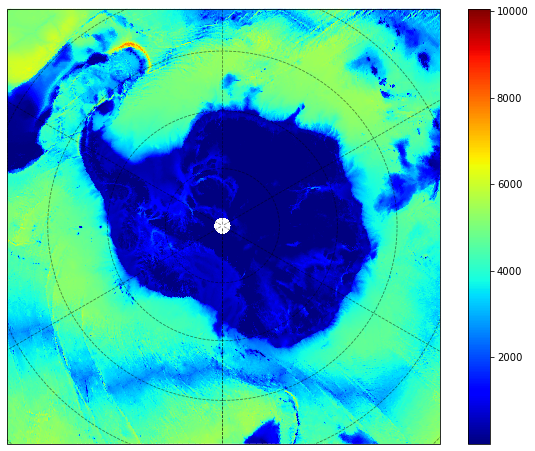

In [82]:
subplot_kws=dict(projection=ccrs.SouthPolarStereo(central_longitude=0.),
                 facecolor='grey')
plt.figure(figsize=[10,8])
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=0.))
# ax.stock_img()
plt.pcolormesh(grid_mom.lon_b.values,grid_mom.lat_b.values,depth,shading='auto',cmap='jet',transform=ccrs.PlateCarree()),
# plt.clim(-5,18),
plt.colorbar()
ax.set_extent([-180, 180, -53, -90], ccrs.PlateCarree())
ax.gridlines(color='black', alpha=0.5, linestyle='--')
# plt.savefig("H_full_bm.png")
plt.show()

In [ ]:
ds_IS_var = xr.Dataset()
ds_IS_var['depth'] = 0.*topo_Niki.height[1::2,1::2]
ds_IS_var.depth.values = depth.copy()
ds_IS_var.depth.attrs = dict(units='m',description='ocean depth, positive below sea level, clipped at 1 m')
ds_IS_var['bed_elev'] = 0.*topo_Niki.height[1::2,1::2]
ds_IS_var.bed_elev.values = bed_elev.copy()
ds_IS_var.bed_elev.attrs = dict(units='m',description='bed elevation, the same as ocean depth below sea level, negative above sea level')
ds_IS_var['h_mask'] = 0.*topo_Niki.height[1::2,1::2]
ds_IS_var.h_mask.values[:300,:]=mask.copy()
ds_IS_var.h_mask.values[0,:]=3.
ds_IS_var.h_mask.attrs=dict(units='none',description='mask for ice sheet and ice shelf; 1 area covered by ice, 0 open ocean, 2 partially covered; 3 Dirichlet b.c.')
ds_IS_var["float_frac"] = 0.*topo_Niki.height[1::2,1::2]
ds_IS_var.float_frac.values [:300,:]=float_fraction.copy()
ds_IS_var.float_frac.attrs = dict(units='none',description='mask of the grounded ice')
ds_IS_var["OD_av"] = 0.*topo_Niki.height[1::2,1::2]
ds_IS_var.OD_av.values [:300,:]=OD.copy()
ds_IS_var.OD_av.attrs = dict(units='m',description='depth of the water column')
ds_IS_var['thick_shelf'] = 0.*topo_Niki.height[1::2,1::2]
ds_IS_var.thick_shelf.values[:300,:]=thick_cor.copy()
ds_IS_var.thick_shelf.attrs = dict(units='m',description='ice thickness')
ds_IS_var['shelf_mass'] = rho_ice*ds_IS_var.thick_shelf
ds_IS_var.shelf_mass.attrs = dict(units='kg m-2',description='ice mass per unit area, computed as density * ice thickness')
ds_IS_var['shelf_area'] = 0.*topo_Niki.height[1::2,1::2]
ds_IS_var.shelf_area.values[:300,:]=grid_mom.area.values[:300,:]*mask.copy()
ds_IS_var.shelf_area.attrs = dict(units='m2',description='area covered by ice')
ds_IS_var['A_glen'] =  0.*topo_Niki.height[1::2,1::2]
ds_IS_var.A_glen.values = Aglen.copy()
ds_IS_var.A_glen.attrs =dict(units='Pa-1/3 s',description='ice-stiffness parameter')
ds_IS_var['nu'] = 0.*topo_Niki.height[1::2,1::2]
ds_IS_var.nu.values[:300,:]=nu.copy()
ds_IS_var.nu.attrs = dict(units='Pa s',description='ice viscosity computed from observed velocities')
ds_IS_var['tau_b_beta'] =  0.*topo_Niki.height[1::2,1::2]
ds_IS_var.tau_b_beta.values = beta_taub.copy()
ds_IS_var.tau_b_beta.attrs = dict(units='Pa m-1 s',description='basal friction coefficient')
ds_IS_var['VX'] =  0.*grid_mom.lon_b
ds_IS_var.VX.values = vx_f.copy()
ds_IS_var.VX.attrs = dict(units='m s-1',description='obs  u velocity')
ds_IS_var['VY'] =  0.*grid_mom.lon_b
ds_IS_var.VY.values = vx_f.copy()
ds_IS_var.VY.attrs = dict(units='m s-1',description='obs  v velocity')
ds_IS_var['umask'] =  0.*grid_mom.lon_b
ds_IS_var.umask.values = vel_face_mask.copy()
ds_IS_var.umask.attrs = dict(units='none',description='u velocity mask for ice sheet and ice shelf')
ds_IS_var['vmask']=  0.*grid_mom.lon_b
ds_IS_var.vmask.values = vel_face_mask.copy()
ds_IS_var.vmask.attrs = dict(units='none',description='v velocity mask for ice sheet and ice shelf')
ds_IS_var['ufacemask'] =  0.*grid_mom.lon_b
ds_IS_var.ufacemask.values = vel_face_mask.copy()
ds_IS_var.ufacemask.attrs = dict(units='none',description='u velocity face mask for ice sheet and ice shelf')
ds_IS_var['vfacemask'] =  0.*grid_mom.lon_b
ds_IS_var.vfacemask.values = vel_face_mask.copy()
ds_IS_var.vfacemask.attrs = dict(units='none',description='v velocity face mask for ice sheet and ice shelf')
ds_IS_var['ubdry_val'] = 0.*grid_mom.lon_b
ds_IS_var.ubdry_val.values = ubdry_val.copy()
ds_IS_var.ubdry_val.attrs =dict(units='m s-1',description='u velocity at the south boundary')
ds_IS_var['vbdry_val'] = 0.*grid_mom.lon_b
ds_IS_var.vbdry_val.values = vbdry_val.copy()
ds_IS_var.vbdry_val.attrs = dict(units='m s-1',description='v velocity at the south boundary')

# ds_IS_var.to_netcdf(f"{topodir}/AIS_SP_025deg.nc", format='NETCDF3_64BIT')

In [84]:
ds_IS_var

<xarray.Dataset>
Dimensions:      (ny: 1180, nx: 1440, nyp: 1181, nxp: 1441)
Dimensions without coordinates: ny, nx, nyp, nxp
Data variables: (12/19)
    depth        (ny, nx) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    bed_elev     (ny, nx) float64 -288.5 -270.0 -248.9 ... -271.1 -482.6 -290.0
    h_mask       (ny, nx) float64 3.0 3.0 3.0 3.0 3.0 ... 0.0 0.0 0.0 0.0 0.0
    float_frac   (ny, nx) float64 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    OD_av        (ny, nx) float64 -0.0 -0.0 -0.0 -0.0 -0.0 ... 0.0 0.0 0.0 0.0
    thick_shelf  (ny, nx) float64 2.672e+03 2.695e+03 2.715e+03 ... 0.0 0.0 0.0
    ...           ...
    umask        (nyp, nxp) float64 3.0 3.0 3.0 3.0 3.0 ... 0.0 0.0 0.0 0.0 0.0
    vmask        (nyp, nxp) float64 3.0 3.0 3.0 3.0 3.0 ... 0.0 0.0 0.0 0.0 0.0
    ufacemask    (nyp, nxp) float64 3.0 3.0 3.0 3.0 3.0 ... 0.0 0.0 0.0 0.0 0.0
    vfacemask    (nyp, nxp) float64 3.0 3.0 3.0 3.0 3.0 ... 0.0 0.0 0.0 0.0 0.0
    ubdry_val    (nyp, nxp) float64 -1.966e-07 -1.966e-07 -1.964e-07 ... 0.0 0.0
    vbdry_val    (nyp, nxp) float64 -2.238e-09 -2.238e-09 -3.016e-09 ... 0.0 0.0

In [86]:
ds_IS_var.to_netcdf(f"{topodir}/AIS_SP_025deg.nc", format='NETCDF3_64BIT')

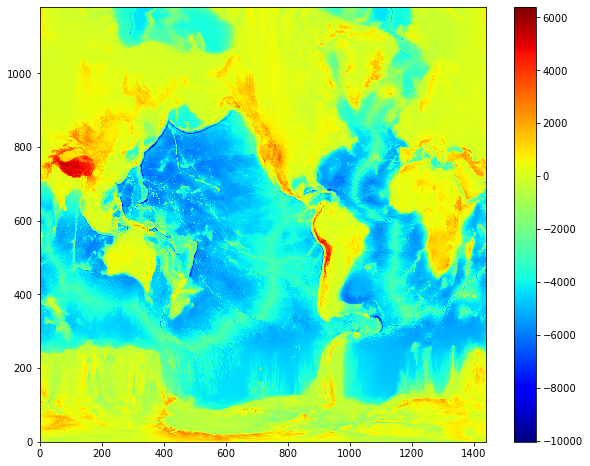

In [76]:
plt.figure(figsize=[10,8])
# ax.stock_img()
plt.pcolormesh(ds_topo.bed,shading='auto',cmap='jet'),
# plt.clim([-6000,6000]),
plt.colorbar()
# ax.set_extent([-180, 180, -65, -90], ccrs.PlateCarree())
# ax.gridlines(color='black', alpha=0.5, linestyle='--')
# plt.savefig("/home/Olga.Sergienko/gridtopo_sandbox/PIG_ice_speed.eps")
plt.show()

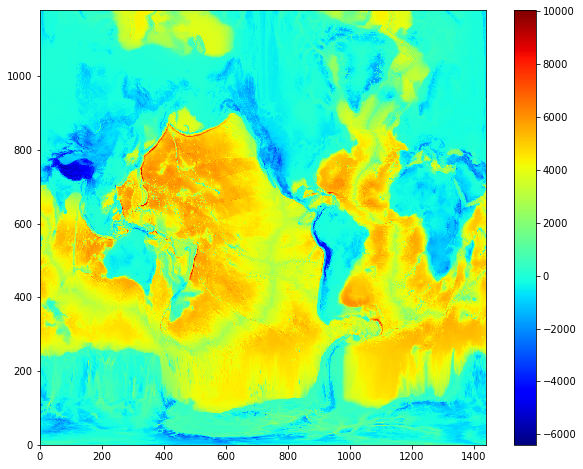

In [79]:
plt.figure(figsize=[10,8])
# ax.stock_img()
plt.pcolormesh(bed_elev,shading='auto',cmap='jet'),
# plt.clim([-6000,6000]),
plt.colorbar()
# ax.set_extent([-180, 180, -65, -90], ccrs.PlateCarree())
# ax.gridlines(color='black', alpha=0.5, linestyle='--')
# plt.savefig("/home/Olga.Sergienko/gridtopo_sandbox/PIG_ice_speed.eps")
plt.show()

In [77]:
ds_topo = xr.Dataset()
ds_topo['bed'] = topo_Niki.height[1::2,1::2]
ds_topo['h_std'] = topo_Niki.h_std[1::2,1::2]
ds_topo['wet'] = topo_Niki.wet[1::2,1::2]
ds_topo.bed.values[:300,:]=topo_BM.bed.values.copy()
ds_topo.wet.values[:300,:]=np.where(ds_topo.bed.values[:300,:]<0.,1.0,0.0)
# ds_topo.to_netcdf(f"{topodir}/ocean_topo_SP_025deg.nc", format='NETCDF3_64BIT')
depth=-ds_topo.bed.values.copy()
depth[depth<1.]=1.
bed_elev=-ds_topo.bed.values.copy()

In [61]:
ds_topo

<xarray.Dataset>
Dimensions:  (ny: 1180, nx: 1440)
Dimensions without coordinates: ny, nx
Data variables:
    bed      (ny, nx) float64 288.5 270.0 248.9 229.1 ... 271.1 482.6 290.0
    h_std    (ny, nx) float64 ...
    wet      (ny, nx) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [80]:
ds_thick = xr.Dataset()
ds_thick['thick_shelf'] = 0.*topo_Niki.height[1::2,1::2]
ds_thick.thick_shelf.values[:300,:]=thick_cor.copy()
ds_thick.to_netcdf(f"{topodir}/AIS_thick_SP_025deg.nc", format='NETCDF3_64BIT')

In [81]:
ds_thick

<xarray.Dataset>
Dimensions:      (ny: 1180, nx: 1440)
Dimensions without coordinates: ny, nx
Data variables:
    thick_shelf  (ny, nx) float64 2.672e+03 2.695e+03 2.715e+03 ... 0.0 0.0 0.0

In [40]:
grid_mom = xr.Dataset()
grid_mom['lon'] = hgrid['x'][1::2, 1::2].rename(nxp='nx', nyp='ny')
grid_mom['lat'] = hgrid['y'][1::2, 1::2].rename(nxp='nx',nyp='ny')
grid_mom['lon_b'] = hgrid['x'][0::2, 0::2]
grid_mom['lat_b'] = hgrid['y'][0::2, 0::2]
grid_mom['area']=hgrid['area'][::2,::2]+hgrid['area'][1::2,::2]+hgrid['area'][::2,1::2]+hgrid['area'][1::2,1::2]

In [54]:
grid_mom

<xarray.Dataset>
Dimensions:  (ny: 1180, nx: 1440, nyp: 1181, nxp: 1441)
Dimensions without coordinates: ny, nx, nyp, nxp
Data variables:
    lon      (ny, nx) float64 ...
    lat      (ny, nx) float64 ...
    lon_b    (nyp, nxp) float64 ...
    lat_b    (nyp, nxp) float64 ...

In [8]:
topo_Niki_pc=xr.concat([topo_SC,topo_SO,topo_Merc,topo_BP],dim="ny")

In [9]:
topo_Niki_pc

<xarray.Dataset>
Dimensions:  (ny: 2384, nx: 2880)
Dimensions without coordinates: ny, nx
Data variables:
    tile     (ny) |S255 b'' b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b'' b''
    height   (ny, nx) float64 -43.44 -43.57 -43.56 -43.52 ... 444.0 476.0 290.0
    wet      (ny, nx) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    h_std    (ny, nx) float64 8.202 8.322 8.384 8.461 8.554 ... 0.0 0.0 0.0 0.0
    h_min    (ny, nx) float64 -45.44 -45.5 -45.5 -45.56 ... 444.0 476.0 290.0
    h_max    (ny, nx) float64 -41.41 -41.64 -41.62 -41.5 ... 444.0 476.0 290.0
    x        (ny, nx) float64 -360.0 -360.0 -360.0 -360.0 ... 60.0 60.0 60.0
    y        (ny, nx) float64 -90.0 -90.0 -90.0 -90.0 ... 64.28 64.22 64.17

In [67]:
height= 0.25*(topo_Niki.height.values[:-1:2,:-1:2]+topo_Niki.height.values[1::2,1::2]+topo_Niki.height.values[1::2,0:-1:2]+topo_Niki.height.values[0:-1:2,1::2])

In [1]:
height

NameError: name 'height' is not defined

In [64]:
hgrid

<xarray.Dataset>
Dimensions:   (nyp: 2361, nxp: 2881, ny: 2360, nx: 2880)
Dimensions without coordinates: nyp, nxp, ny, nx
Data variables:
    tile      |S255 b'tile1'
    y         (nyp, nxp) float64 -88.57 -88.57 -88.57 ... 64.22 64.17 64.11
    x         (nyp, nxp) float64 -300.0 -299.9 -299.8 -299.6 ... 60.0 60.0 60.0
    dy        (ny, nxp) float64 7.937e+03 7.937e+03 7.937e+03 ... 49.51 24.8 0.0
    dx        (nyp, nx) float64 346.3 346.3 346.3 ... 6.05e+03 6.062e+03
    area      (ny, nx) float64 2.817e+06 2.817e+06 ... 2.248e+05 7.521e+04
    angle_dx  (nyp, nxp) float64 0.0 0.0 0.0 0.0 0.0 ... -90.0 -90.0 -90.0 -90.0
Attributes:
    history:      This grid file was generated via command /home/Olga.Sergien...
    description:  This is an orthogonal coordinate grid for the Earth with a ...
    source:       /home/Olga.Sergienko/ocean_model_grid_generator/ocean_grid_...

In [41]:
grid_SC= xr.open_dataset('/work/ovs/iOM4/SP_025deg19r.ncSC.nc')
grid_SO= xr.open_dataset('/work/ovs/iOM4/SP_025deg19r.ncSO.nc')
grid_Merc= xr.open_dataset('/work/ovs/iOM4/SP_025deg19r.ncMerc.nc')
grid_BP= xr.open_dataset('/work/ovs/iOM4/SP_025deg19r.ncBP.nc')
grid_19r= xr.open_dataset('/work/ovs/iOM4/SP_025deg19r.nc')

In [48]:
grid_cnc=xr.concat([grid_SC.y,grid_SO.y,grid_Merc.y,grid_BP.y],dim="nyp")
grid_ar=xr.concat([grid_SC.area,grid_SO.area,grid_Merc.area,grid_BP.area],dim="ny")

In [57]:
grid_cnc[18:,:]

<xarray.DataArray 'y' (nyp: 2366, nxp: 2881)>
array([[-88.71520338, -88.71520338, -88.71520338, ..., -88.71520338,
        -88.71520338, -88.71520338],
       [-88.64382579, -88.64382579, -88.64382579, ..., -88.64382579,
        -88.64382579, -88.64382579],
       [-88.5724482 , -88.5724482 , -88.5724482 , ..., -88.5724482 ,
        -88.5724482 , -88.5724482 ],
       ...,
       [ 64.11369415,  64.16821218,  64.22262352, ...,  64.22262352,
         64.16821218,  64.11369415],
       [ 64.11369415,  64.16821355,  64.22262626, ...,  64.22262626,
         64.16821355,  64.11369415],
       [ 64.11369415,  64.16821401,  64.22262717, ...,  64.22262717,
         64.16821401,  64.11369415]])
Dimensions without coordinates: nyp, nxp
Attributes:
    units:    degrees

In [51]:
grid_19r.y

<xarray.DataArray 'y' (nyp: 2363, nxp: 2881)>
array([[-88.715203, -88.715203, -88.715203, ..., -88.715203, -88.715203,
        -88.715203],
       [-88.643826, -88.643826, -88.643826, ..., -88.643826, -88.643826,
        -88.643826],
       [-88.572448, -88.572448, -88.572448, ..., -88.572448, -88.572448,
        -88.572448],
       ...,
       [ 64.113694,  64.168212,  64.222624, ...,  64.222624,  64.168212,
         64.113694],
       [ 64.113694,  64.168214,  64.222626, ...,  64.222626,  64.168214,
         64.113694],
       [ 64.113694,  64.168214,  64.222627, ...,  64.222627,  64.168214,
         64.113694]])
Dimensions without coordinates: nyp, nxp
Attributes:
    units:    degrees

In [39]:
grid_cnc[-20:,:]

<xarray.DataArray 'y' (nyp: 20, nxp: 2881)>
array([[64.11369415, 64.16804934, 64.22229848, ..., 64.22229848,
        64.16804934, 64.11369415],
       [64.11369415, 64.1680662 , 64.22233213, ..., 64.22233213,
        64.1680662 , 64.11369415],
       [64.11369415, 64.16808215, 64.22236396, ..., 64.22236396,
        64.16808215, 64.11369415],
       ...,
       [64.11369415, 64.16821218, 64.22262352, ..., 64.22262352,
        64.16821218, 64.11369415],
       [64.11369415, 64.16821355, 64.22262626, ..., 64.22262626,
        64.16821355, 64.11369415],
       [64.11369415, 64.16821401, 64.22262717, ..., 64.22262717,
        64.16821401, 64.11369415]])
Dimensions without coordinates: nyp, nxp
Attributes:
    units:    degrees